# Housing in Tennessee

### Data Preparation and Cleaning

This dataset contains property sale records from Tennessee, USA, detailing sale prices, acreage, land use types, sale years, tax districts, and other relevant property information.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
data = pd.read_excel("Housing Data.xlsx")
print("data type:", type(data))
print("data shape:", data.shape)
data.head(2)

data type: <class 'pandas.core.frame.DataFrame'>
data shape: (56477, 19)


,UniqueID,ParcelID,LandUse,PropertyAddress,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,Acreage,TaxDistrict,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
0,2045,007 00 0 125.00,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000,20130412-0036474,No,"FRAZIER, CYRENTHA LYNETTE","1808 FOX CHASE DR, GOODLETTSVILLE, TN",2.3,GENERAL SERVICES DISTRICT,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0
1,16918,007 00 0 130.00,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",2014-06-10,366000,20140619-0053768,No,"BONER, CHARLES & LESLIE","1832 FOX CHASE DR, GOODLETTSVILLE, TN",3.5,GENERAL SERVICES DISTRICT,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0


In [3]:
# remove columns not intended for use
data.drop(columns = ["ParcelID", "LegalReference", "OwnerName", "OwnerAddress"],
          inplace = True)

# remove empty cells that may distort the data
data.dropna(inplace = True)

print("data shape:", data.shape)
print(data.info())

data shape: (23995, 15)
<class 'pandas.core.frame.DataFrame'>
Index: 23995 entries, 0 to 54214
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   UniqueID         23995 non-null  int64         
 1   LandUse          23995 non-null  object        
 2   PropertyAddress  23995 non-null  object        
 3   SaleDate         23995 non-null  datetime64[ns]
 4   SalePrice        23995 non-null  int64         
 5   SoldAsVacant     23995 non-null  object        
 6   Acreage          23995 non-null  float64       
 7   TaxDistrict      23995 non-null  object        
 8   LandValue        23995 non-null  float64       
 9   BuildingValue    23995 non-null  float64       
 10  TotalValue       23995 non-null  float64       
 11  YearBuilt        23995 non-null  float64       
 12  Bedrooms         23995 non-null  float64       
 13  FullBath         23995 non-null  float64       
 14  HalfBath         23

In [4]:
## convert to 'LandUse', 'PropertyAddress' and 'TaxDistrict' to a more readable case
data["LandUse"] = data["LandUse"].str.title()
data["PropertyAddress"] = data["PropertyAddress"].str.title()
data["TaxDistrict"] = data["TaxDistrict"].str.title()

# convert 'YearBuilt', 'Bedrooms', 'FullBaths' and 'HalfBath' from float to integers
data[["YearBuilt", "Bedrooms", "FullBath", "HalfBath"]] = data[["YearBuilt", "Bedrooms", "FullBath", "HalfBath"]].astype(int)

# convert 'SalePrice' from integer to float
data["SalePrice"] = data["SalePrice"].astype(float)

## extract city names from the 'PropertyAddress' and create 'City' col
data["City"] = data["PropertyAddress"].str.split(",", expand = True)[1]

## strip 'City' for consistency
data["City"] = data["City"].str.strip()

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23995 entries, 0 to 54214
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   UniqueID         23995 non-null  int64         
 1   LandUse          23995 non-null  object        
 2   PropertyAddress  23995 non-null  object        
 3   SaleDate         23995 non-null  datetime64[ns]
 4   SalePrice        23995 non-null  float64       
 5   SoldAsVacant     23995 non-null  object        
 6   Acreage          23995 non-null  float64       
 7   TaxDistrict      23995 non-null  object        
 8   LandValue        23995 non-null  float64       
 9   BuildingValue    23995 non-null  float64       
 10  TotalValue       23995 non-null  float64       
 11  YearBuilt        23995 non-null  int32         
 12  Bedrooms         23995 non-null  int32         
 13  FullBath         23995 non-null  int32         
 14  HalfBath         23995 non-null  int32     

In [5]:
## descriptive statistics for each numerical col in the dataset
data[["SalePrice", 
      "Acreage", 
      "LandValue", 
      "BuildingValue", 
      "TotalValue", 
      "Bedrooms", 
      "FullBath", 
      "HalfBath"]].describe()

,SalePrice,Acreage,LandValue,BuildingValue,TotalValue,Bedrooms,FullBath,HalfBath
count,2.399500e+04,23995.000000,2.399500e+04,2.399500e+04,2.399500e+04,23995.000000,23995.000000,23995.000000
mean,2.750196e+05,0.454385,6.897284e+04,1.723201e+05,2.439482e+05,3.091102,1.892853,0.285434
std,3.032231e+05,0.790103,1.019178e+05,1.927877e+05,2.712536e+05,0.851988,0.954485,0.488769
min,1.000000e+02,0.040000,1.000000e+02,1.400000e+03,1.260000e+04,0.000000,0.000000,0.000000
25%,1.250000e+05,0.190000,2.200000e+04,8.350000e+04,1.094000e+05,3.000000,1.000000,0.000000
50%,1.850000e+05,0.270000,2.990000e+04,1.171000e+05,1.543000e+05,3.000000,2.000000,0.000000
75%,3.249565e+05,0.450000,6.030000e+04,1.885500e+05,2.779000e+05,3.500000,2.000000,1.000000
max,1.075000e+07,47.500000,1.869000e+06,5.824300e+06,6.402600e+06,11.000000,10.000000,3.000000


In [45]:
## count instances of each 'LandUse' category
print("Land Use feature before editing:")
data["LandUse"].value_counts().tail()

## edit the 'flawed' instances in 'LandUse' and add a new category
for i in data["LandUse"]:
    if i == "Vacant Res Land":
        data["LandUse"] = data["LandUse"].str.replace( i, "Vacant Residential Land")
    elif i in ["Club/Union Hall/Lodge", "Convenience Market Without Gas", 
             "Light Manufacturing", "Strip Shopping Center",
             "One Story General Retail Store"]:
        data["LandUse"] = data["LandUse"].str.replace( i, "Other Commercial Use")
    elif i[0:9] == "Greenbelt":
        data["LandUse"] = data["LandUse"].str.replace( i, "Greenbelt")

## count instances of each 'LandUse' category
print("Land Use feature after editing:")
data["LandUse"].value_counts().head()

Land Use feature before editing:
Land Use feature after editing:


LandUse
Single Family              21268
Duplex                      1184
Zero Lot Line                845
Vacant Residential Land      471
Triplex                       76
Name: count, dtype: int64

In [7]:
## convert all 'SoldAsVacant' values as 'Yes' or 'No'
## count all 'SoldAsVacant' instances
data["SoldAsVacant"] = data["SoldAsVacant"].map(lambda x: "Yes" if x in ["Y", "Yes"] else "No")
data["SoldAsVacant"].value_counts()

SoldAsVacant
No     23577
Yes      418
Name: count, dtype: int64

In [8]:
## count all 'TaxDistrict' instances
data["TaxDistrict"].value_counts()

TaxDistrict
Urban Services District      18381
General Services District     4287
City Of Goodlettsville         366
City Of Oak Hill               360
City Of Forest Hills           360
City Of Belle Meade            220
City Of Berry Hill              21
Name: count, dtype: int64

In [9]:
## count all 'City' instances
data["City"].value_counts()

City
Nashville         18964
Antioch            1284
Madison            1217
Hermitage          1025
Old Hickory         831
Goodlettsville      455
Brentwood           182
Whites Creek         19
Joelton              11
Mount Juliet          7
Name: count, dtype: int64

## Data Exploration

In [123]:
data.describe()

,UniqueID,SaleDate,SalePrice,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,PricePerAcre
count,23995.000000,23995,2.399500e+04,23995.000000,2.399500e+04,2.399500e+04,2.399500e+04,23995.000000,23995.000000,23995.000000,23995.000000,2.399500e+04
mean,27784.816879,2015-01-25 07:30:02.025422080,2.750196e+05,0.454385,6.897284e+04,1.723201e+05,2.439482e+05,1963.643717,3.091102,1.892853,0.285434,9.186546e+05
min,1.000000,2013-01-02 00:00:00,1.000000e+02,0.040000,1.000000e+02,1.400000e+03,1.260000e+04,1799.000000,0.000000,0.000000,0.000000,1.282051e+02
25%,13243.500000,2014-03-14 00:00:00,1.250000e+05,0.190000,2.200000e+04,8.350000e+04,1.094000e+05,1948.000000,3.000000,1.000000,0.000000,3.768377e+05
50%,27475.000000,2015-03-02 00:00:00,1.850000e+05,0.270000,2.990000e+04,1.171000e+05,1.543000e+05,1960.000000,3.000000,2.000000,0.000000,6.000000e+05
75%,42223.500000,2015-12-21 00:00:00,3.249565e+05,0.450000,6.030000e+04,1.885500e+05,2.779000e+05,1983.000000,3.500000,2.000000,1.000000,1.083491e+06
max,56616.000000,2019-12-13 00:00:00,1.075000e+07,47.500000,1.869000e+06,5.824300e+06,6.402600e+06,2017.000000,11.000000,10.000000,3.000000,3.142857e+07
std,16605.330086,NaN,3.032231e+05,0.790103,1.019178e+05,1.927877e+05,2.712536e+05,26.434132,0.851988,0.954485,0.488769,9.965866e+05


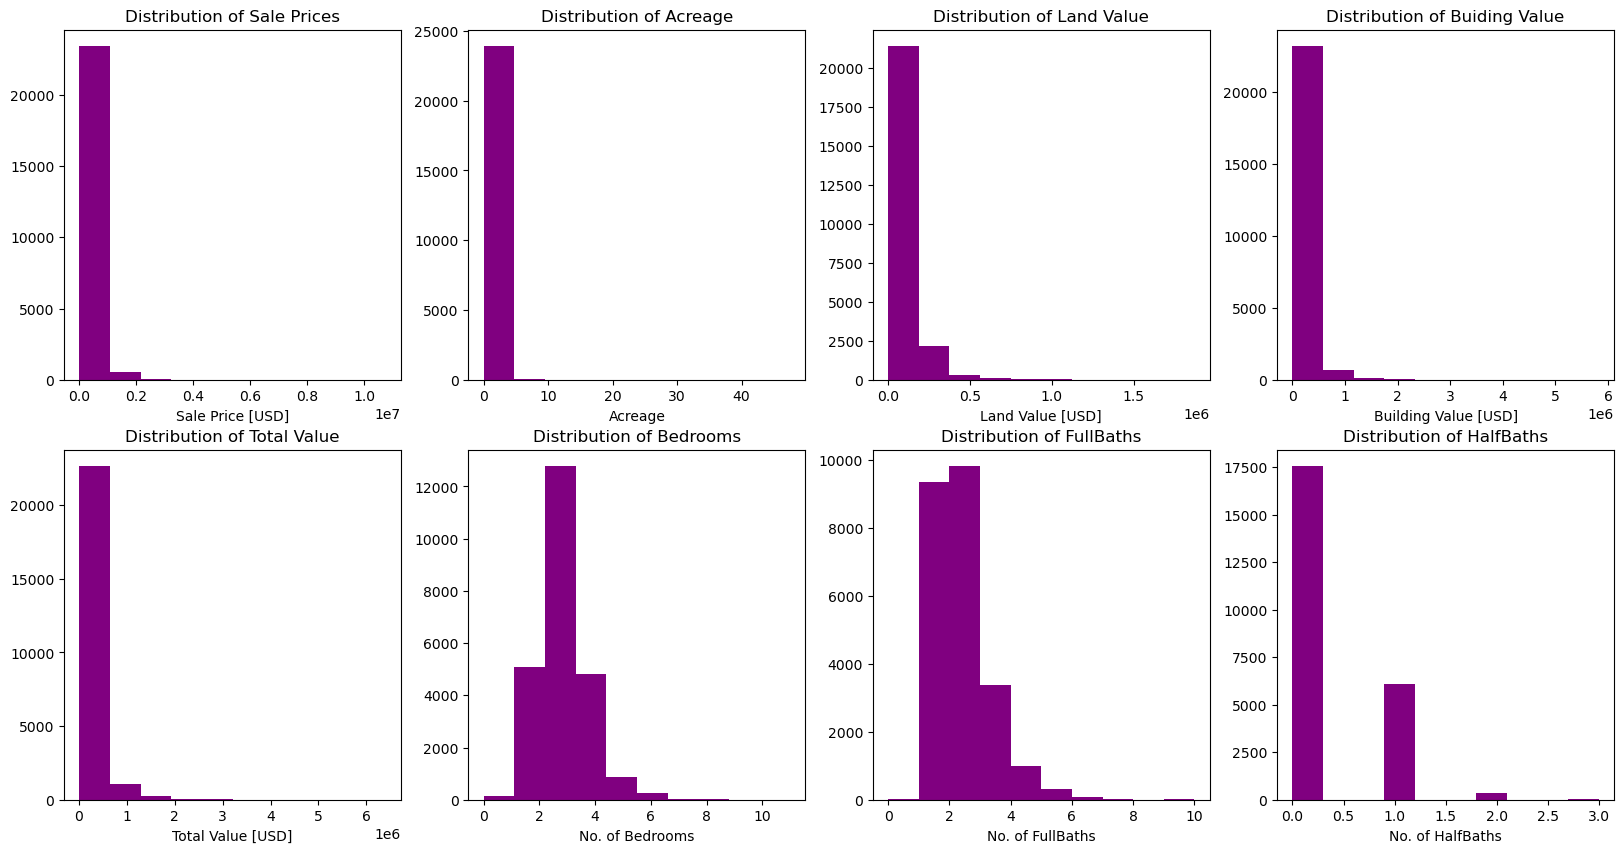

In [98]:
## histograms showing the distributions of different features
fig, ax = plt.subplots(2,4, figsize=(20,10))
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['purple'])

ax[0,0].hist(data["SalePrice"])
ax[0,0].set_xlabel("Sale Price [USD]")
ax[0,0].set_title("Distribution of Sale Prices")

ax[0,1].hist(data["Acreage"])
ax[0,1].set_xlabel("Acreage")
ax[0,1].set_title("Distribution of Acreage")

ax[0,2].hist(data["LandValue"])
ax[0,2].set_xlabel("Land Value [USD]")
ax[0,2].set_title("Distribution of Land Value")

ax[0,3].hist(data["BuildingValue"])
ax[0,3].set_xlabel("Building Value [USD]")
ax[0,3].set_title("Distribution of Buiding Value")

ax[1,0].hist(data["TotalValue"])
ax[1,0].set_xlabel("Total Value [USD]")
ax[1,0].set_title("Distribution of Total Value")

ax[1,1].hist(data["Bedrooms"])
ax[1,1].set_xlabel("No. of Bedrooms")
ax[1,1].set_title("Distribution of Bedrooms")

ax[1,2].hist(data["FullBath"])
ax[1,2].set_xlabel("No. of FullBaths")
ax[1,2].set_title("Distribution of FullBaths")

ax[1,3].hist(data["HalfBath"])
ax[1,3].set_xlabel("No. of HalfBaths")
ax[1,3].set_title("Distribution of HalfBaths");

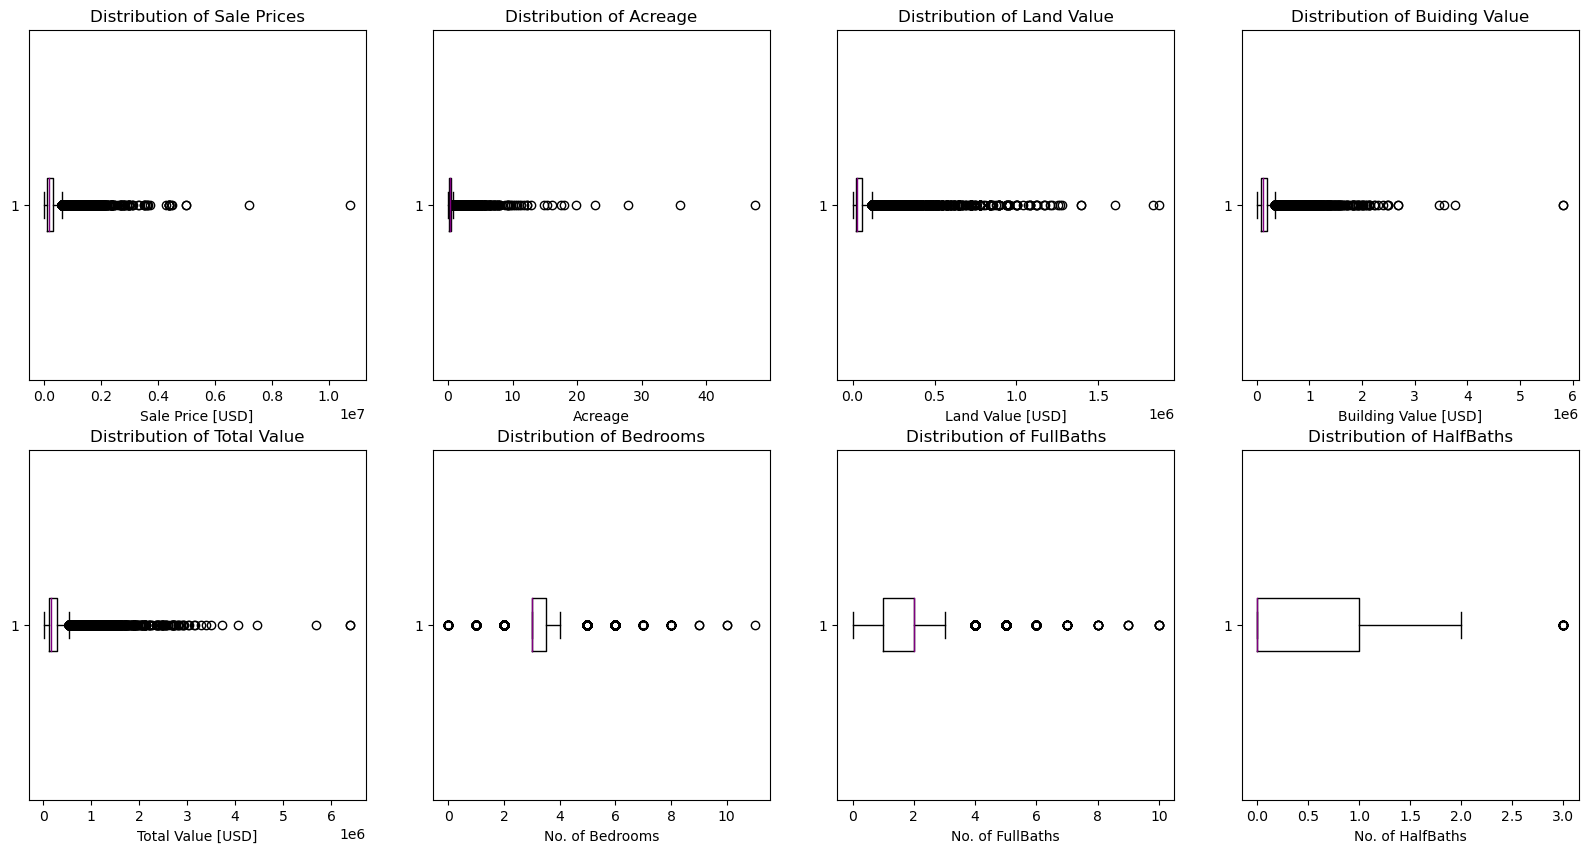

In [100]:
## boxplots showing the distributions of different features
fig, ax = plt.subplots(2,4, figsize=(20,10))

ax[0,0].boxplot(data["SalePrice"], vert = False)
ax[0,0].set_xlabel("Sale Price [USD]")
ax[0,0].set_title("Distribution of Sale Prices")

ax[0,1].boxplot(data["Acreage"], vert = False)
ax[0,1].set_xlabel("Acreage")
ax[0,1].set_title("Distribution of Acreage")

ax[0,2].boxplot(data["LandValue"], vert = False)
ax[0,2].set_xlabel("Land Value [USD]")
ax[0,2].set_title("Distribution of Land Value")

ax[0,3].boxplot(data["BuildingValue"], vert = False)
ax[0,3].set_xlabel("Building Value [USD]")
ax[0,3].set_title("Distribution of Buiding Value")

ax[1,0].boxplot(data["TotalValue"], vert = False)
ax[1,0].set_xlabel("Total Value [USD]")
ax[1,0].set_title("Distribution of Total Value")

ax[1,1].boxplot(data["Bedrooms"], vert = False)
ax[1,1].set_xlabel("No. of Bedrooms")
ax[1,1].set_title("Distribution of Bedrooms")

ax[1,2].boxplot(data["FullBath"], vert = False)
ax[1,2].set_xlabel("No. of FullBaths")
ax[1,2].set_title("Distribution of FullBaths")

ax[1,3].boxplot(data["HalfBath"], vert = False)
ax[1,3].set_xlabel("No. of HalfBaths")
ax[1,3].set_title("Distribution of HalfBaths");

### Which city has the most expensive real estate market?

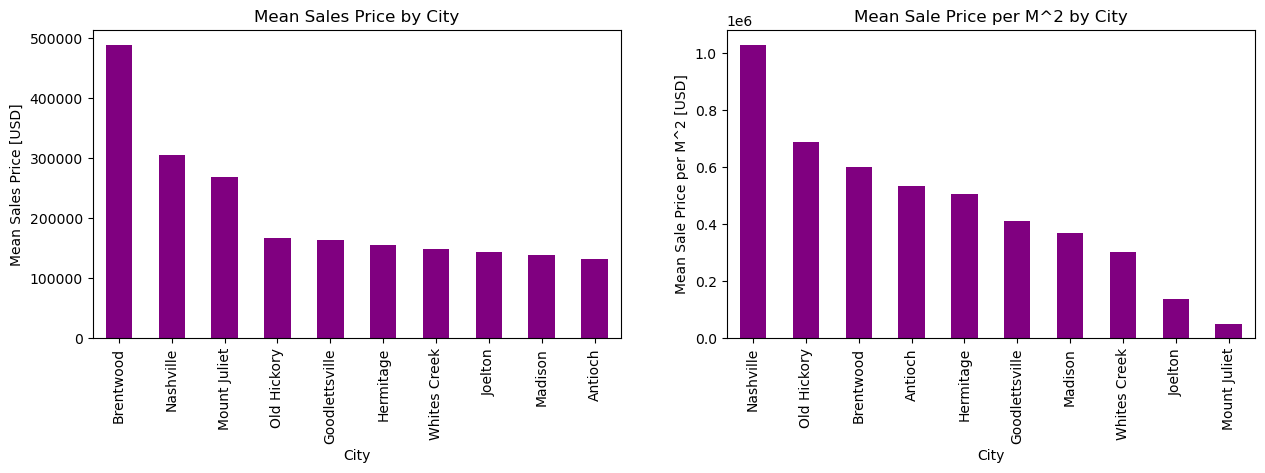

In [101]:
## create a new column 'PricePerAcre'
data["PricePerAcre"] = data["SalePrice"]/data["Acreage"]

fig, ax = plt.subplots(1,2, figsize=(15, 4))

## calculate mean house price per city and plot it in a bar graph

(
    data.groupby("City")
    ["SalePrice"].mean()
    .sort_values(ascending = False)
).plot(ax = ax[0],
    kind = "bar")
ax[0].set_xlabel("City")
ax[0].set_ylabel("Mean Sales Price [USD]")
ax[0].set_title("Mean Sales Price by City") 


## calculate mean house price per acre by city and plot it in a bar graph

(
    data.groupby("City")
    ["PricePerAcre"].mean()
    .sort_values(ascending = False)
).plot(ax = ax[1], kind = "bar")
ax[1].set_xlabel("City")
ax[1].set_ylabel("Mean Sale Price per M^2 [USD]")
ax[1].set_title("Mean Sale Price per M^2 by City");

### Is there a relationship between home size and price?

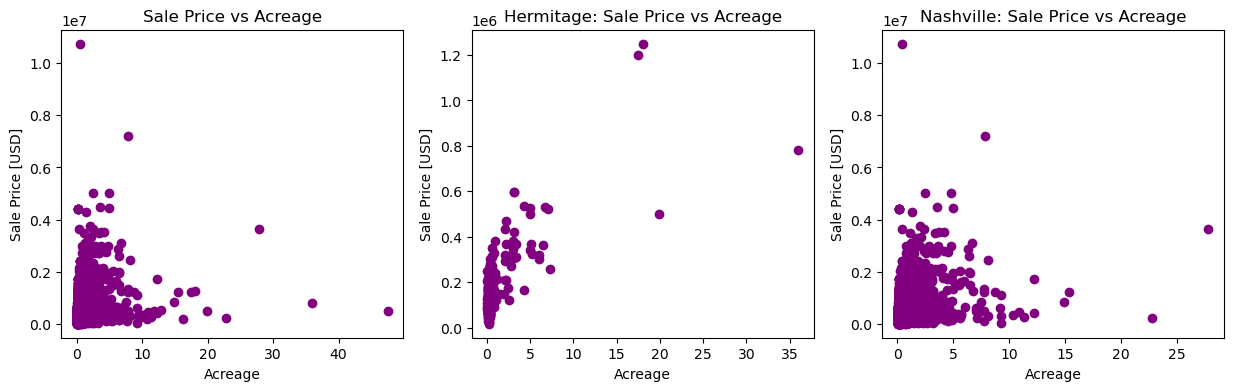

In [103]:
fig, ax = plt.subplots(1,3, figsize = (15,4))

## taking a closer look at the relationship between price and acreage across all cities
ax[0].scatter(x = data["Acreage"], y = data["SalePrice"])
ax[0].set_xlabel("Acreage")
ax[0].set_ylabel("Sale Price [USD]")
ax[0].set_title("Sale Price vs Acreage")

## taking a closer look at the relationship between price and acreage in Hermitage city
data_hermitage = data[data["City"] == "Hermitage"]
ax[1].scatter(x = data_hermitage["Acreage"], y = data_hermitage["SalePrice"])
ax[1].set_xlabel("Acreage")
ax[1].set_ylabel("Sale Price [USD]")
ax[1].set_title("Hermitage: Sale Price vs Acreage")

## taking a closer look at the relationship between price and acreage in Nashville city
data_nashville = data[data["City"] == "Nashville"]
ax[2].scatter(x = data_nashville["Acreage"], y = data_nashville["SalePrice"])
ax[2].set_xlabel("Acreage")
ax[2].set_ylabel("Sale Price [USD]")
ax[2].set_title("Nashville: Sale Price vs Acreage");

In [104]:
# print out the correlations between 'SalePrice' and 'Acreage' - overally, in Hermitage and Nashville
print("Overall Correlation between Sale Price and Acreage:", data["SalePrice"].corr(data["Acreage"]).round(2))
print("Correlation between Sale Price and Acreage in Hermitage:", data_hermitage["SalePrice"].corr(data_hermitage["Acreage"]).round(2))
print("Correlation between Sale Price and Acreage in Nashville:", data_nashville["SalePrice"].corr(data_nashville["Acreage"]).round(2))

Overall Correlation between Sale Price and Acreage: 0.29
Correlation between Sale Price and Acreage in Hermitage: 0.68
Correlation between Sale Price and Acreage in Nashville: 0.36


### Is there a relationship between land value and price?

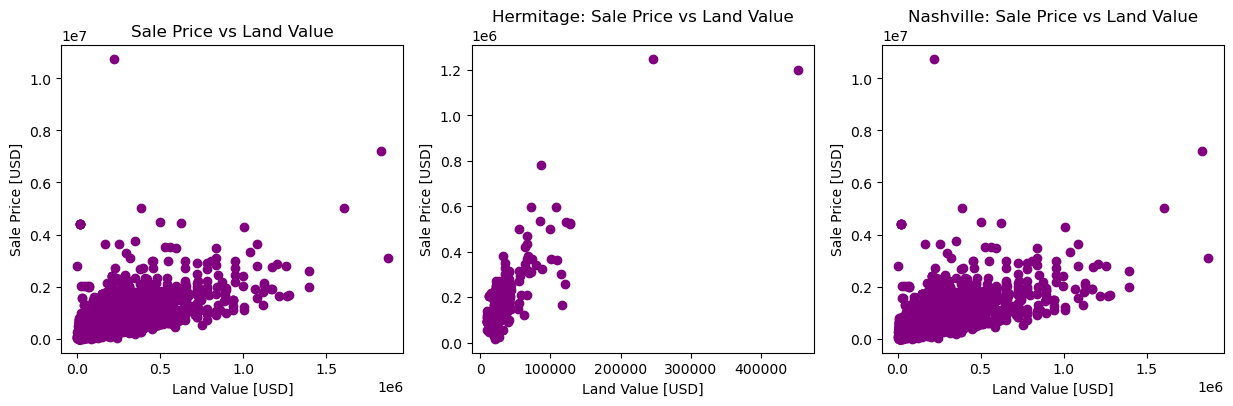

In [105]:
fig, ax = plt.subplots(1,3, figsize = (15,4))

## taking a closer look at the relationship between price and landvalue across all cities
ax[0].scatter(x = data["LandValue"], y = data["SalePrice"])
ax[0].set_xlabel("Land Value [USD]")
ax[0].set_ylabel("Sale Price [USD]")
ax[0].set_title("Sale Price vs Land Value")

## taking a closer look at the relationship between price and landvalue in Hermitage city
ax[1].scatter(x = data_hermitage["LandValue"], y = data_hermitage["SalePrice"])
ax[1].set_xlabel("Land Value [USD]")
ax[1].set_ylabel("Sale Price [USD]")
ax[1].set_title("Hermitage: Sale Price vs Land Value")

## taking a closer look at the relationship between price and landvalue in Nashville city
ax[2].scatter(x = data_nashville["LandValue"], y = data_nashville["SalePrice"])
ax[2].set_xlabel("Land Value [USD]")
ax[2].set_ylabel("Sale Price [USD]")
ax[2].set_title("Nashville: Sale Price vs Land Value");

In [106]:
# print out the correlations between 'SalePrice' and 'LandValue' - overally, in Hermitage and Nashville
print("Overall Correlation between Sale Price and Land Value:", data["SalePrice"].corr(data["LandValue"]).round(2))
print("Correlation between Sale Price and Land Value in Hermitage:", data_hermitage["SalePrice"].corr(data_hermitage["LandValue"]).round(2))
print("Correlation between Sale Price and Land Value in Nashville:", data_nashville["SalePrice"].corr(data_nashville["LandValue"]).round(2))

Overall Correlation between Sale Price and Land Value: 0.74
Correlation between Sale Price and Land Value in Hermitage: 0.81
Correlation between Sale Price and Land Value in Nashville: 0.73


### Is there a relationship between building value and price?

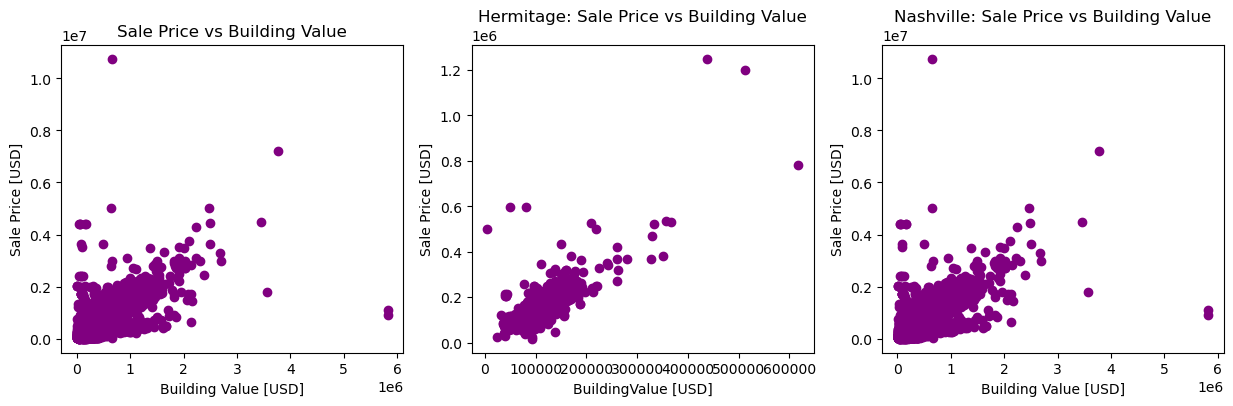

In [107]:
fig, ax = plt.subplots(1,3, figsize = (15,4))

## taking a closer look at the relationship between price and landvalue across all cities
ax[0].scatter(x = data["BuildingValue"], y = data["SalePrice"])
ax[0].set_xlabel("Building Value [USD]")
ax[0].set_ylabel("Sale Price [USD]")
ax[0].set_title("Sale Price vs Building Value")

## taking a closer look at the relationship between price and landvalue in Hermitage city
ax[1].scatter(x = data_hermitage["BuildingValue"], y = data_hermitage["SalePrice"])
ax[1].set_xlabel("BuildingValue [USD]")
ax[1].set_ylabel("Sale Price [USD]")
ax[1].set_title("Hermitage: Sale Price vs Building Value")

## taking a closer look at the relationship between price and landvalue in Nashville city
ax[2].scatter(x = data_nashville["BuildingValue"], y = data_nashville["SalePrice"])
ax[2].set_xlabel("Building Value [USD]")
ax[2].set_ylabel("Sale Price [USD]")
ax[2].set_title("Nashville: Sale Price vs Building Value");

In [108]:
# print out the correlations between 'SalePrice' and 'BuildingValue' - overally, in Hermitage and Nashville
print("Overall Correlation between Sale Price and Building Value:", data["SalePrice"].corr(data["LandValue"]).round(2))
print("Correlation between Sale Price and Building Value in Hermitage:", data_hermitage["SalePrice"].corr(data_hermitage["BuildingValue"]).round(2))
print("Correlation between Sale Price and Building Value in Nashville:", data_nashville["SalePrice"].corr(data_nashville["BuildingValue"]).round(2))

Overall Correlation between Sale Price and Building Value: 0.74
Correlation between Sale Price and Building Value in Hermitage: 0.79
Correlation between Sale Price and Building Value in Nashville: 0.72


### How does the year built influence house sale prices and sales volume?

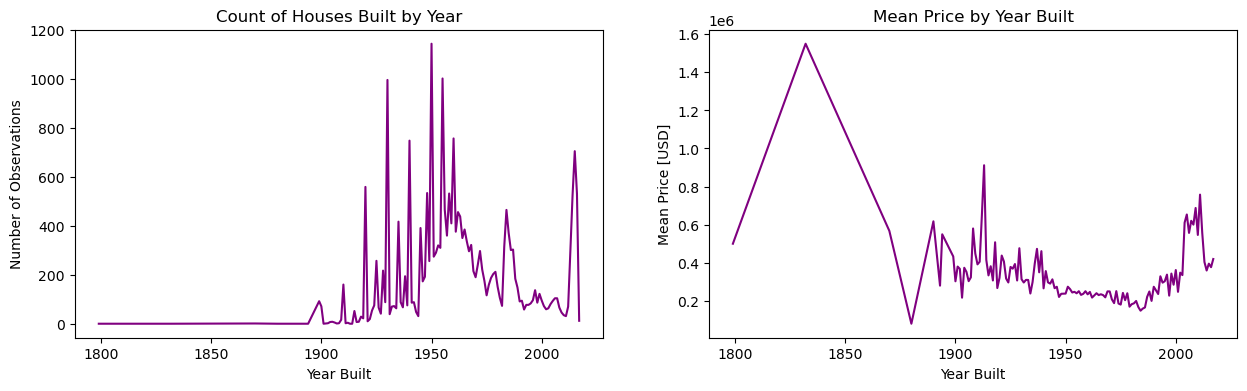

In [110]:
fig, ax = plt.subplots(1, 2, figsize=(15,4))

## plot the number of houses sold based on the year they were built
(data.groupby("YearBuilt")["YearBuilt"].count()).plot(ax = ax[0])
ax[0].set_xlabel("Year Built")
ax[0].set_ylabel("Number of Observations")
ax[0].set_title("Count of Houses Built by Year")

## plot the mean price of houses based on the year they were build
(data.groupby("YearBuilt")["SalePrice"].mean()).plot(ax= ax[1])
ax[1].set_xlabel("Year Built")
ax[1].set_ylabel("Mean Price [USD]")
ax[1].set_title("Mean Price by Year Built");

### How do house sale prices and total sales revenue vary by year sold?

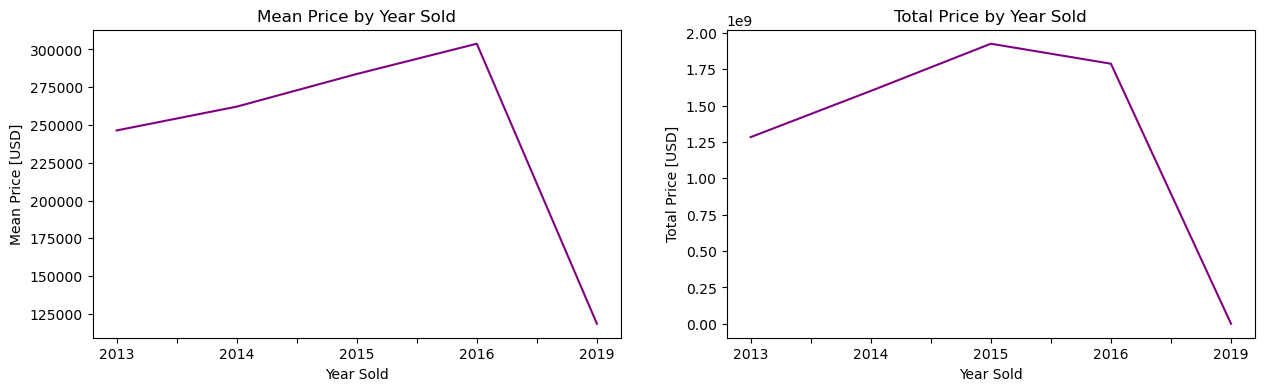

In [115]:
fig, ax = plt.subplots(1, 2, figsize=(15,4))

## Extract year of sale from the 'SaleDate'
data["YearSold"] = [str(x)[0:4] for x in data["SaleDate"]]

## plot the mean price of houses based on the year they were sold
(data.groupby("YearSold")["SalePrice"].mean()).plot(ax = ax[0])
ax[0].set_xlabel("Year Sold")
ax[0].set_ylabel("Mean Price [USD]")
ax[0].set_title("Mean Price by Year Sold")

## plot the total price of houses based on the year they were sold
(data.groupby("YearSold")["SalePrice"].sum()).plot(ax = ax[1])
ax[1].set_xlabel("Year Sold")
ax[1].set_ylabel("Total Price [USD]")
ax[1].set_title("Total Price by Year Sold");

### What is the average sale price difference between vacant and unvacant land?

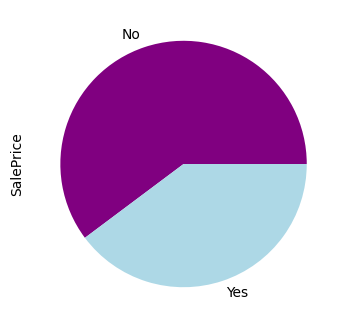

In [118]:
## average price of vacant and unvacant land
plt.figure(figsize=(5,4))
data.groupby("SoldAsVacant")["SalePrice"].mean().plot(kind = "pie", colors = ["purple", "lightblue"]);

### How does the mean sale price of different land uses vary over the years?

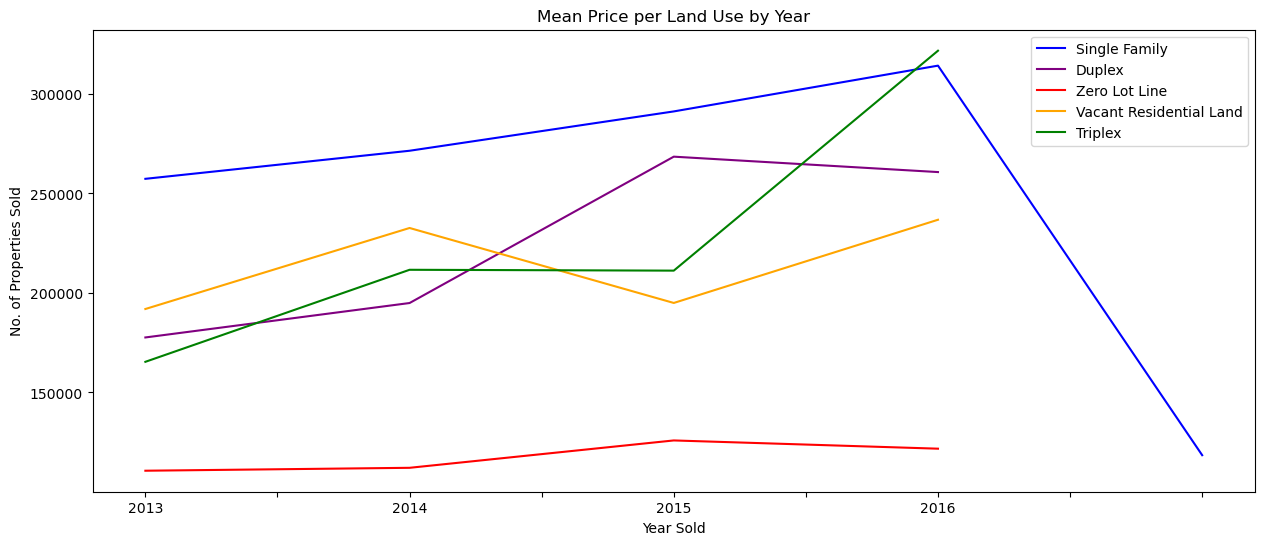

In [121]:
plt.figure(figsize = (15,6))

data[data["LandUse"] == "Single Family"].groupby("YearSold")["SalePrice"].mean().plot(kind = 'line', color = 'blue', label = "Single Family")
data[data["LandUse"] == "Duplex"].groupby("YearSold")["SalePrice"].mean().plot(kind = 'line', color = 'purple', label = "Duplex")
data[data["LandUse"] == "Zero Lot Line"].groupby("YearSold")["SalePrice"].mean().plot(kind = 'line', color = 'red', label = "Zero Lot Line")
data[data["LandUse"] == "Vacant Residential Land"].groupby("YearSold")["SalePrice"].mean().plot(kind = 'line', color = 'orange', label = "Vacant Residential Land")
data[data["LandUse"] == "Triplex"].groupby("YearSold")["SalePrice"].mean().plot(kind = 'line', color = 'green', label = "Triplex")
plt.xlabel("Year Sold")
plt.ylabel("No. of Properties Sold")
plt.title("Mean Price per Land Use by Year")
plt.legend();

## Findings

These are some findings I made based on the data preparation, cleaning and exploratory data analysis (EDA) that I did:

